# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
attitude.roll         1751 non-null float64
attitude.pitch        1751 non-null float64
attitude.yaw          1751 non-null float64
gravity.x             1751 non-null float64
gravity.y             1751 non-null float64
gravity.z             1751 non-null float64
rotationRate.x        1751 non-null float64
rotationRate.y        1751 non-null float64
rotationRate.z        1751 non-null float64
userAcceleration.x    1751 non-null float64
userAcceleration.y    1751 non-null float64
userAcceleration.z    1751 non-null float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [5]:
# Your code here:
r,c = sensor.shape
print(r,c)

1751 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
#Para ver el número de ciclos en segundos.
a = 29*60+10+1
print(a)

1751


In [7]:
# Your code here:
date = pd.date_range(start="1/1/2018 00:00:00",end="1/1/2018 00:29:10",periods=r)


In [8]:
sensor['date']=date
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [9]:
# Your code here:
sensor.index = pd.DatetimeIndex(sensor.date, freq='infer')
sensor = sensor.drop(columns="date")
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [19]:
# Your code here:
import statsmodels.api as sm

data = sensor['userAcceleration.x']

#result = sm.tsa.seasonal_decompose(data,freq=60) --> Daba un warning porque prefiere period.
result = sm.tsa.seasonal_decompose(data,period=60)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

Figure(432x288)


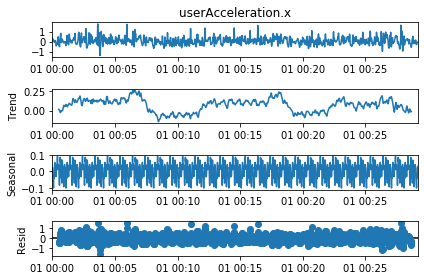

In [11]:
print(result.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

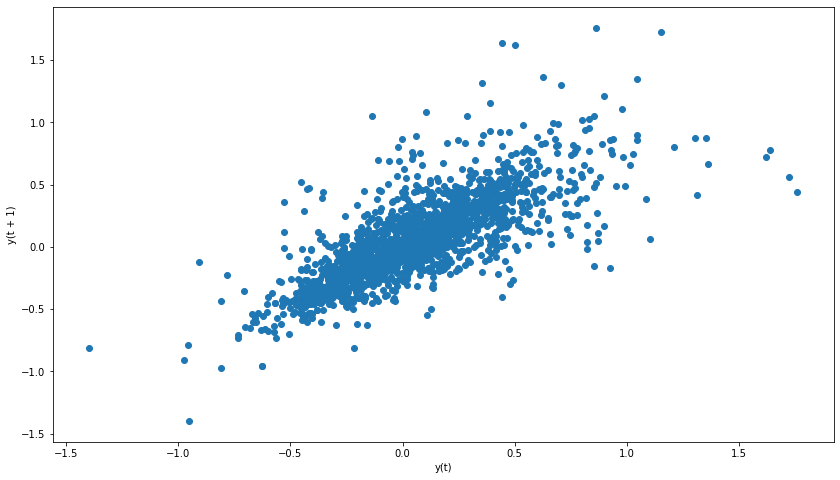

In [16]:
# Your code here:
data = sensor['userAcceleration.x']
plt.figure(figsize=(14,8))
pd.plotting.lag_plot(data)

Create a lag plot for `rotationRate.x`

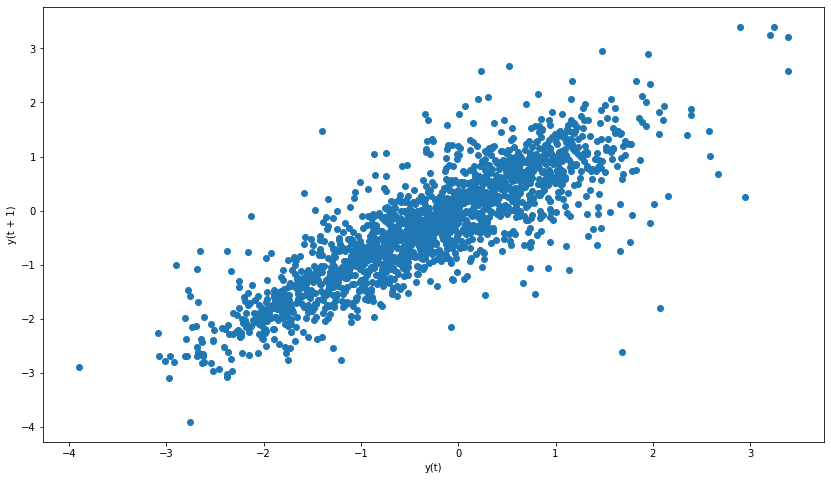

In [17]:
# Your code here:
data = sensor['rotationRate.x']
plt.figure(figsize=(14,8))
pd.plotting.lag_plot(data)

What are your conclusions from both visualizations?

In [ ]:
# Your conclusions here:
## Ambos parámetros a pesar de guardar relación, tenemos que testear su resultado. 
##Su estacionalidad puede estar determinada entre el valor posterior y su valor inmediatamente futuro.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [27]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

In [90]:
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
print([(col,stationaryCheck(sensor[col])) for col in sensor.columns])

[('attitude.roll', 'Stationary'), ('attitude.pitch', 'Not-Stationary'), ('attitude.yaw', 'Stationary'), ('gravity.x', 'Not-Stationary'), ('gravity.y', 'Not-Stationary'), ('gravity.z', 'Stationary'), ('rotationRate.x', 'Stationary'), ('rotationRate.y', 'Stationary'), ('rotationRate.z', 'Stationary'), ('userAcceleration.x', 'Stationary'), ('userAcceleration.y', 'Stationary'), ('userAcceleration.z', 'Stationary')]


In [98]:
ls=[]
for col in sensor.columns:
    dc=dict()
    dc["variable"]=col
    dc["p_value"]=adfuller(sensor[col])[1]
    dc["result"]=stationaryCheck(sensor[col])
    ls.append(dc)
                                 
pval_res = pd.DataFrame(ls)
pval_res

,variable,p_value,result
0,attitude.roll,8.424761e-08,Stationary
1,attitude.pitch,2.868855e-01,Not-Stationary
2,attitude.yaw,2.977820e-02,Stationary
3,gravity.x,3.343413e-01,Not-Stationary
4,gravity.y,2.782501e-01,Not-Stationary
5,gravity.z,2.274698e-09,Stationary
6,rotationRate.x,6.320230e-06,Stationary
7,rotationRate.y,3.206725e-24,Stationary
8,rotationRate.z,4.321292e-21,Stationary
9,userAcceleration.x,2.823439e-30,Stationary


In [30]:
p_accx = adfuller(data['userAcceleration.x'])[1]
p_rotx = adfuller(data['rotationRate.x'])[1]

print(f"pv_accx={p_accx}, pv_rotx={p_rotx}")

pv_accx=2.823439483037483e-30, pv_rotx=6.3202303359123905e-06


What are your conclusions from this test?

In [31]:
# Your conclusions here:

## Como el pvalue < 0.5 --> Reject the null hypothesis (H0=The data has unit root)
## The data does not have a unit root and is stationary.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [86]:
# Your code here:


#Diferenciamos entre realidad(test) y real-future
dr = sensor.index
print(dr.shape)

realidad = sensor.loc[dr[0:-10]]
real_futuro = sensor.loc[dr[-10:]]
print(realidad.shape,real_futuro.shape)
real_futuro

(1751,)
(1741, 12) (10, 12)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:29:01,1.634509,-0.539902,2.480230,0.856019,0.514052,0.054613,1.065054,2.373071,-0.040047,0.149749,-0.137389,-0.023470
2018-01-01 00:29:02,1.671799,-0.541547,2.463982,0.852545,0.515462,0.086403,0.497726,2.192886,-0.042711,0.038461,-0.045660,0.013450
2018-01-01 00:29:03,1.707251,-0.545910,2.455201,0.846711,0.519196,0.116260,0.426906,1.919032,-0.227657,-0.169175,-0.000015,0.134503
2018-01-01 00:29:04,1.739734,-0.551012,2.445058,0.839866,0.523550,0.143251,0.414523,1.851654,-0.150745,-0.300361,0.030939,0.114638
2018-01-01 00:29:05,1.771197,-0.555716,2.441679,0.832521,0.527551,0.169107,0.027461,1.528635,-0.287630,-0.270174,0.096304,0.033270
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


In [47]:
from statsmodels.tsa.arima_model import ARMA

predictions = dict()

for col in realidad.columns:
    train = realidad[col]
    test = futuro[col]

    # Entrena el modelo ARMA
    model = ARMA(train,order=(2, 1))
    print(f"Entrenando con los datos de la serie {col}")
    model_fit = model.fit(maxlag=10)
    
    # Predice los valores ARMA
    predictions[col] = model_fit.predict(start=len(train),
                                        end=len(train)+len(test)-1, 
                                        dynamic=False)
    
predict = pd.DataFrame(predictions)
predict

Entrenando con los datos de la serie attitude.roll
Entrenando con los datos de la serie attitude.pitch
Entrenando con los datos de la serie attitude.yaw
Entrenando con los datos de la serie gravity.x
Entrenando con los datos de la serie gravity.y
Entrenando con los datos de la serie gravity.z
Entrenando con los datos de la serie rotationRate.x
Entrenando con los datos de la serie rotationRate.y
Entrenando con los datos de la serie rotationRate.z
Entrenando con los datos de la serie userAcceleration.x
Entrenando con los datos de la serie userAcceleration.y
Entrenando con los datos de la serie userAcceleration.z


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:29:01,1.620212,-0.539325,2.423669,0.856458,0.513467,0.042081,1.373041,1.705654,0.032688,0.173149,-0.127540,-0.055026
2018-01-01 00:29:02,1.627198,-0.541631,2.334856,0.854101,0.515278,0.048176,0.890942,1.209567,0.083885,0.142896,-0.044023,0.017220
2018-01-01 00:29:03,1.625009,-0.544552,2.252199,0.851463,0.517563,0.046697,0.611923,0.845998,0.111979,0.100522,0.005141,0.051517
2018-01-01 00:29:04,1.615138,-0.547907,2.169751,0.848658,0.520186,0.038814,0.384221,0.574529,0.127334,0.070106,0.019202,0.062454
2018-01-01 00:29:05,1.599104,-0.551555,2.090994,0.845767,0.523040,0.025747,0.215089,0.370730,0.135705,0.056099,0.014282,0.064272
2018-01-01 00:29:06,1.578399,-0.555389,2.013714,0.842845,0.526042,0.008719,0.086477,0.217496,0.140260,0.053778,0.004944,0.063798
2018-01-01 00:29:07,1.554442,-0.559324,1.939142,0.839930,0.529126,-0.011090,-0.010736,0.102230,0.142735,0.056790,-0.001599,0.063230
2018-01-01 00:29:08,1.528539,-0.563296,1.866429,0.837047,0.532242,-0.032579,-0.084328,0.015514,0.144079,0.060646,-0.004099,0.062941
2018-01-01 00:29:09,1.501862,-0.567256,1.795989,0.834214,0.535351,-0.054748,-0.140017,-0.049725,0.144809,0.063316,-0.004001,0.062843
2018-01-01 00:29:10,1.475425,-0.571168,1.727473,0.831442,0.538424,-0.076721,-0.182162,-0.098808,0.145205,0.064493,-0.003031,0.062824


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [56]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

## Dedemos comparar nuestro df PREDICT con el resultado real guardado en el df REAL_FUTURO.
lst=[]
for col in predict.columns:
    rmse_val = rmse(futuro[col], predict[col])
    dc=dict()
    dc["variable"]=col 
    dc["RMSE_sm"]=rmse_val
    lst.append(dc)

error = pd.DataFrame(lst)
error

,variable,RMSE_sm
0,attitude.roll,0.231716
1,attitude.pitch,0.012070
2,attitude.yaw,0.442533
3,gravity.x,0.021720
4,gravity.y,0.011381
5,gravity.z,0.190001
6,rotationRate.x,0.338499
7,rotationRate.y,1.021695
8,rotationRate.z,0.424222
9,userAcceleration.x,0.225299


In [58]:

from sklearn.metrics import mean_squared_error

# squared => If True returns MSE value, if False returns RMSE value.
lst=[]
for col in predict.columns:
    mse_val = mean_squared_error(futuro[col], predict[col])
    rmse_val = np.sqrt(mse_val)
    dc=dict()
    dc["variable"]=col 
    dc["RMSE_skl"]=rmse_val
    dc["MSE_skl"]=mse_val
    lst.append(dc)

error_skl = pd.DataFrame(lst)
error_skl

,variable,RMSE_skl,MSE_skl
0,attitude.roll,0.231716,0.053692
1,attitude.pitch,0.012070,0.000146
2,attitude.yaw,0.442533,0.195836
3,gravity.x,0.021720,0.000472
4,gravity.y,0.011381,0.000130
5,gravity.z,0.190001,0.036100
6,rotationRate.x,0.338499,0.114582
7,rotationRate.y,1.021695,1.043862
8,rotationRate.z,0.424222,0.179965
9,userAcceleration.x,0.225299,0.050759


In [88]:
d = error_skl.RMSE_skl[error_skl.variable == "userAcceleration.x"]
print(d[9])

0.22529863455816979


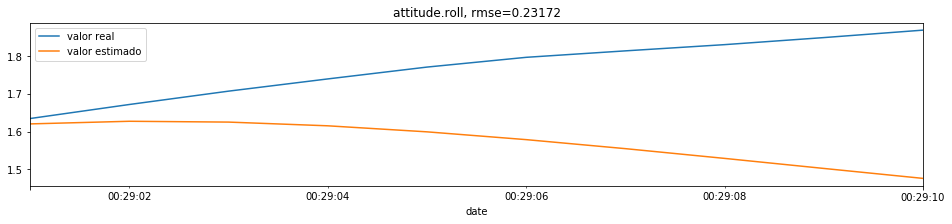

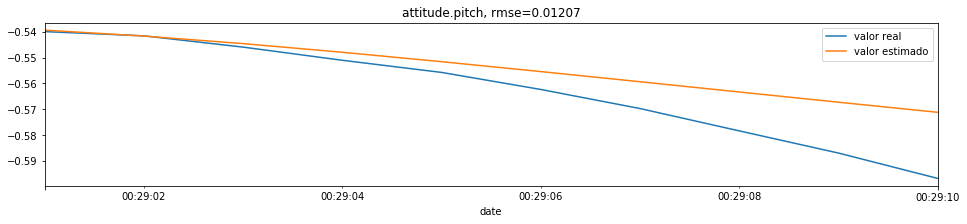

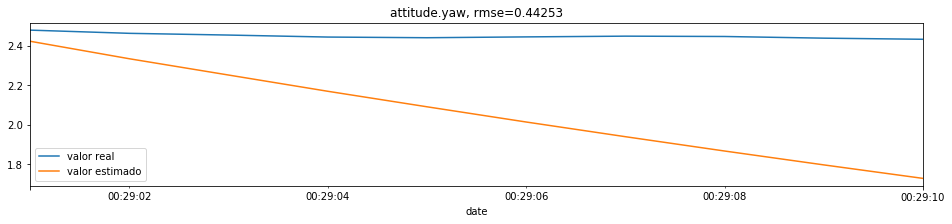

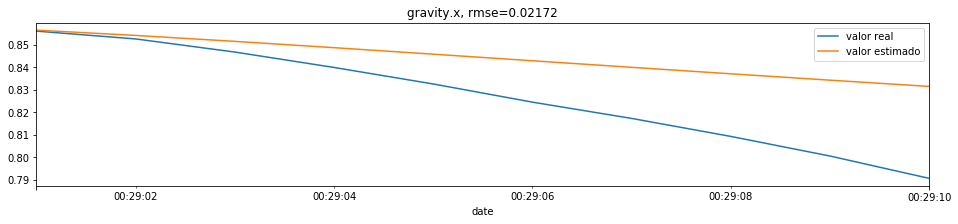

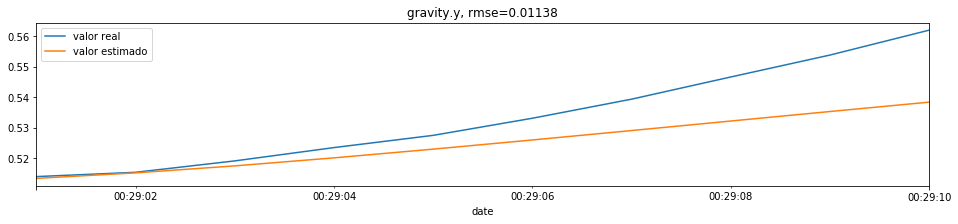

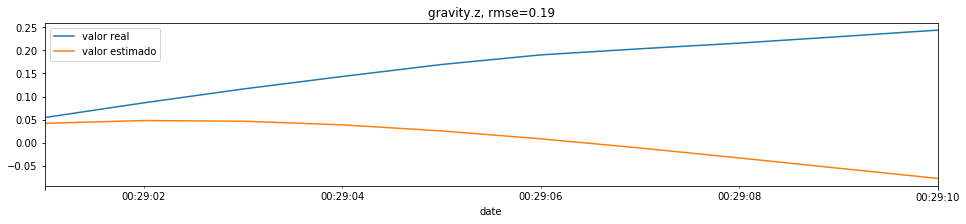

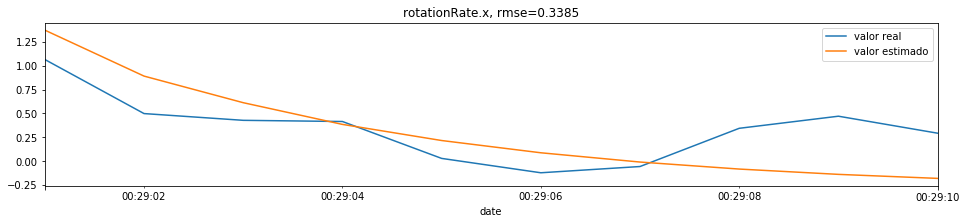

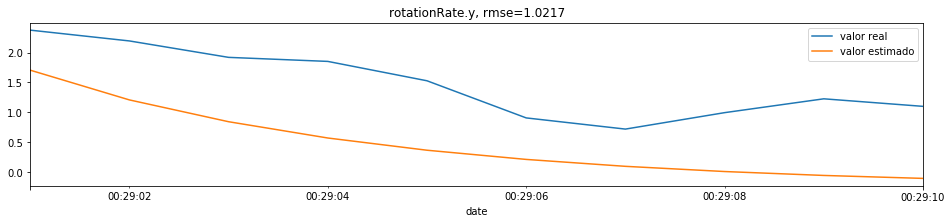

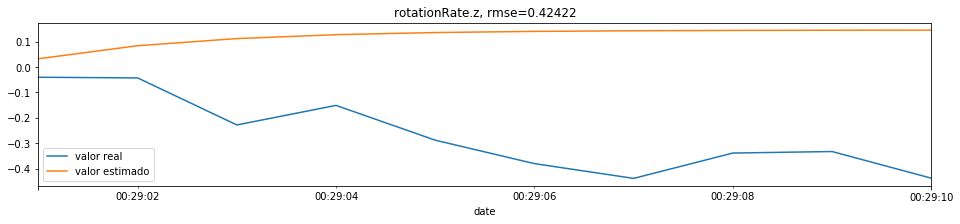

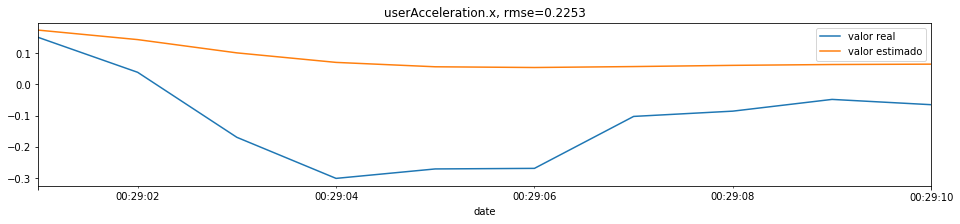

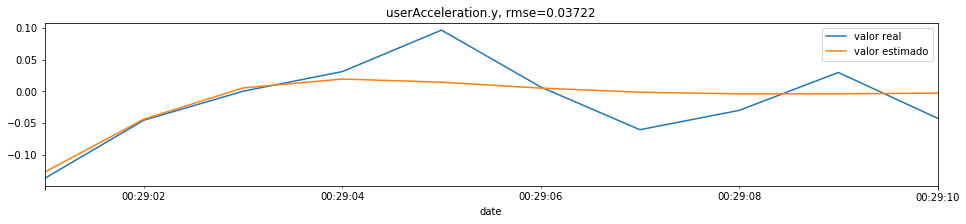

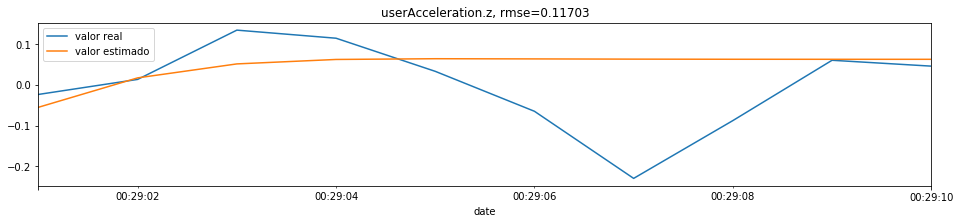

In [84]:
for ind,col in enumerate(predict.columns):
    data = error_skl.RMSE_skl[error_skl.variable == col]
    data = data[ind].round(5)
    plt.figure(figsize=(16,3))
    futuro[col].plot()
    predict[col].plot()
    plt.title(f"{col}, rmse={data}")
    plt.legend(["valor real","valor estimado"])